In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


#  Reading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:

d=r'/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv'
data  = pd.read_csv(d)
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

# Splitting data into Train and cross validation(or test): Stratified Sampling

In [4]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train.shape

(73196, 8)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(73196, 8)
(73196,)
(36052, 8)
(36052,)


# Make Data Model Ready: encoding eassay, and project_title</h2>

<h2> Set1: BOW 

In [6]:
vectorizer_essay = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer_essay.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer_essay.transform(X_train['essay'].values)

X_test_essay_bow = vectorizer_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


# Make Data Model Ready: encoding numerical, categorical features</h2>

## Encoding categorical features:

# School State

In [7]:
vectorizer_School_State = CountVectorizer()
vectorizer_School_State.fit(X_train['school_state'].values) 
X_train_state_ohe = vectorizer_School_State.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_School_State.transform(X_test['school_state'].values)
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_School_State.get_feature_names())


After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# teacher_prefix

In [8]:
vectorizer_teacher_prefix= CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) 

X_train_teacher_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# project_grade_category

In [9]:
vectorizer_project_grade_category = CountVectorizer()
vectorizer_project_grade_category .fit(X_train['project_grade_category'].values)
X_train_grade_ohe = vectorizer_project_grade_category .transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_project_grade_category .get_feature_names())

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# clean_categories

In [10]:
vectorizer_clean_categories = CountVectorizer()
vectorizer_clean_categories.fit(X_train['clean_categories'].values)
X_train_clean_categories_ohe = vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_clean_categories.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(vectorizer_clean_categories.get_feature_names())

After vectorizations
(73196, 9) (73196,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# clean_subcategories

In [11]:
vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values)
X_train_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_clean_subcategories.get_feature_names())

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# Encoding categorical features:

# teacher_number_of_previously_posted_projects

In [12]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(X_train['teacher_number_of_previously_posted_projects'].values.shape)
X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacher_number_of_previously_posted_projects_norm=X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm=X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)



(73196,)
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


<h2>Price</h2>

In [13]:
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
print(X_train['price'].values.shape)
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
print(X_train_price_norm)

(73196,)
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
[[0.00582162]
 [0.00053602]
 [0.00393682]
 ...
 [0.00143373]
 [0.00111188]
 [0.00087728]]


###  Concatinating all the features

In [131]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


<h2>Appling NB on different kind of featurization as mentioned in the instructions</h2>


In [132]:
def batch_predict(clf, data):
  

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000

    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

# Find the best hyper paramter using k-fold cross validation(GridsearchCV)

[-11.512925464970229, -7.600902459542082, -9.210340371976182, -5.298317366548036, -6.907755278982137, -2.995732273553991, -4.605170185988091, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092]
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


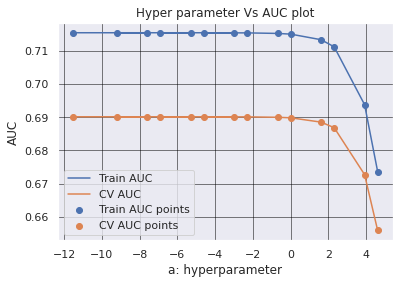

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.093019,0.002946,0.009702,0.000248,1e-05,{'alpha': 1e-05},0.692061,0.692461,0.690175,0.674570,0.693107,0.701943,0.686520,0.690976,0.678889,0.700682,0.690139,0.008069,1,0.714506,0.716050,0.715297,0.716999,0.715826,0.714583,0.715091,0.715557,0.715910,0.714712,0.715453,0.000739
2,0.092654,0.003030,0.009640,0.000218,0.0001,{'alpha': 0.0001},0.692061,0.692462,0.690175,0.674570,0.693107,0.701943,0.686520,0.690976,0.678889,0.700683,0.690138,0.008069,2,0.714506,0.716050,0.715297,0.716999,0.715826,0.714583,0.715091,0.715557,0.715910,0.714712,0.715453,0.000739
1,0.091031,0.000581,0.009578,0.000204,0.0005,{'alpha': 0.0005},0.692061,0.692461,0.690175,0.674569,0.693107,0.701942,0.686520,0.690976,0.678889,0.700683,0.690138,0.008069,3,0.714505,0.716050,0.715297,0.716999,0.715826,0.714583,0.715091,0.715557,0.715910,0.714712,0.715453,0.000739
4,0.093198,0.003648,0.009733,0.000269,0.001,{'alpha': 0.001},0.692061,0.692461,0.690175,0.674569,0.693107,0.701942,0.686520,0.690976,0.678889,0.700682,0.690138,0.008069,4,0.714505,0.716050,0.715297,0.716999,0.715825,0.714582,0.715091,0.715557,0.715909,0.714712,0.715453,0.000739
3,0.092111,0.003626,0.009550,0.000154,0.005,{'alpha': 0.005},0.692060,0.692460,0.690172,0.674568,0.693106,0.701941,0.686519,0.690974,0.678890,0.700680,0.690137,0.008069,5,0.714503,0.716048,0.715296,0.716997,0.715824,0.714581,0.715089,0.715555,0.715908,0.714710,0.715451,0.000739


In [133]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

neigh = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
log_alphas=[]
for i in parameters['alpha']:
  a= math.log(i)
  log_alphas.append(a)
print(log_alphas)

clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
print(results.columns)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
a =  results['param_alpha']

plt.plot(log_alphas, train_auc, label='Train AUC')


plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.xlabel("a: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")

plt.show()

results.head()

In [134]:
results[['param_alpha','mean_test_score','mean_train_score']]
best_alpha=clf.best_params_
best_alpha

{'alpha': 1e-05}

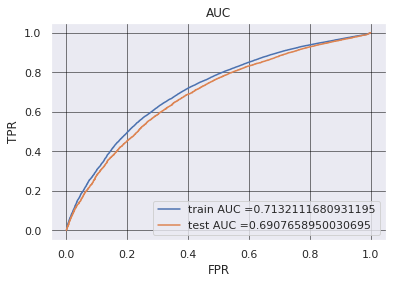

In [135]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

neigh = MultinomialNB(alpha=best_alpha['alpha'],class_prior=[0.5,0.5])
neigh.fit(X_tr, y_train)

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

#Find the best hyper paramter using k-fold cross validation(RandomizedSearchCV)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


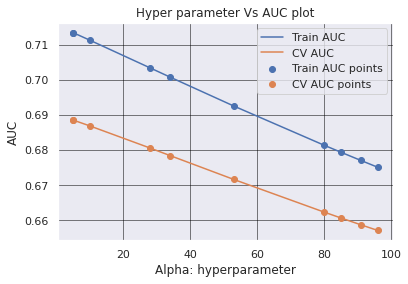

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.093374,0.002647,0.009497,0.000184,5,{'alpha': 5},0.690597,0.691420,0.688092,0.672443,0.691498,0.700453,0.684815,0.689851,0.677002,0.699008,0.688518,0.008251,1,0.712366,0.713870,0.713282,0.714899,0.713675,0.712470,0.713043,0.713488,0.713837,0.712597,0.713353,0.000738
8,0.092715,0.001281,0.010068,0.001655,5,{'alpha': 5},0.690597,0.691420,0.688092,0.672443,0.691498,0.700453,0.684815,0.689851,0.677002,0.699008,0.688518,0.008251,1,0.712366,0.713870,0.713282,0.714899,0.713675,0.712470,0.713043,0.713488,0.713837,0.712597,0.713353,0.000738
1,0.092010,0.000879,0.009450,0.000146,10,{'alpha': 10},0.689023,0.690334,0.686028,0.670353,0.689766,0.698960,0.683042,0.688608,0.675113,0.697299,0.686853,0.008422,3,0.710202,0.711647,0.711212,0.712764,0.711487,0.710319,0.710950,0.711370,0.711728,0.710428,0.711211,0.000739
2,0.093156,0.001794,0.009473,0.000131,28,{'alpha': 28},0.682477,0.686300,0.678586,0.663300,0.683065,0.693183,0.676151,0.683345,0.668489,0.690767,0.680566,0.008838,4,0.702306,0.703515,0.703532,0.704950,0.703501,0.702382,0.703235,0.703575,0.704002,0.702462,0.703346,0.000771
6,0.093115,0.001171,0.009652,0.000204,34,{'alpha': 34},0.680172,0.684938,0.676094,0.661040,0.680689,0.691123,0.673860,0.681371,0.666369,0.688525,0.678418,0.008924,5,0.699684,0.700797,0.700947,0.702338,0.700844,0.699718,0.700653,0.700975,0.701423,0.699795,0.700717,0.000787


In [173]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

neigh = MultinomialNB(class_prior=[0.5,0.5])
parameters_rand = {'alpha':sp_randint(1,100)}
clf_rand = RandomizedSearchCV(neigh, parameters_rand, cv=10, scoring='roc_auc',return_train_score=True)
clf_rand.fit(X_tr, y_train)

results_rand = pd.DataFrame.from_dict(clf_rand.cv_results_)
print(results_rand.columns)

results_rand = results_rand.sort_values(['param_alpha'])

train_auc_rand= results_rand['mean_train_score']
train_auc_std= results_rand['std_train_score']
cv_auc_rand = results_rand['mean_test_score'] 
cv_auc_std= results_rand['std_test_score']
a_rand =  results_rand['param_alpha']

plt.plot(a_rand, train_auc_rand, label='Train AUC')


plt.plot(a_rand, cv_auc_rand, label='CV AUC')

plt.scatter(a_rand, train_auc_rand, label='Train AUC points')
plt.scatter(a_rand, cv_auc_rand, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
results_rand.head()

In [174]:
results_rand[['param_alpha','mean_test_score','mean_train_score']]
best_alpha=clf_rand.best_params_
best_alpha

{'alpha': 5}

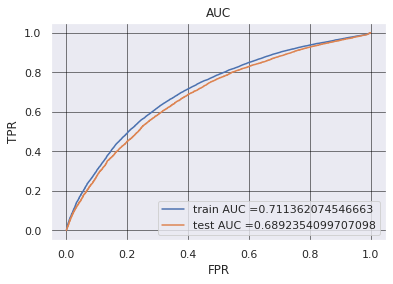

In [175]:
from sklearn.metrics import roc_curve, auc


neigh = MultinomialNB(alpha=best_alpha['alpha'],class_prior=[0.5,0.5])
neigh.fit(X_tr, y_train)

y_train_pred_rand = neigh.predict_proba( X_tr)[:,1]    
y_test_pred_rand = neigh.predict_proba( X_te)[:,1]

train_fpr_rand, train_tpr_rand, tr_thresholds_rand = roc_curve(y_train, y_train_pred_rand)
test_fpr_rand, test_tpr_rand, te_thresholds_rand = roc_curve(y_test, y_test_pred_rand)

plt.plot(train_fpr_rand, train_tpr_rand, label="train AUC ="+str(auc(train_fpr_rand, train_tpr_rand)))
plt.plot(test_fpr_rand, test_tpr_rand, label="test AUC ="+str(auc(test_fpr_rand, test_tpr_rand)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

#Confusion Matrix


In [142]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [143]:

neigh = MultinomialNB(alpha=1e-05,class_prior=[0.5,0.5])
neigh.fit(X_tr, y_train)

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


In [144]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4388343526299907 for threshold 0.553
Train confusion matrix
[[ 7551  3532]
 [22106 40007]]
Test confusion matrix
[[ 3553  1906]
 [11021 19572]]


Confusion Matrix: Train


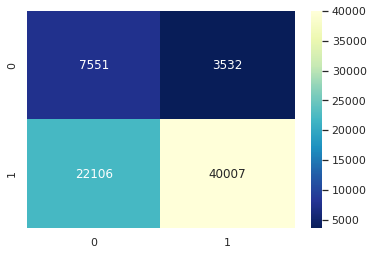

Confusion Matrix: Test


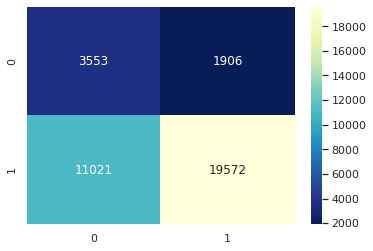

In [150]:
print('Confusion Matrix: Train')
cm_tr=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

print('Confusion Matrix: Test')
cm_tr=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

#Set2:TF-IDF

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_essay_tfidf.fit(X_train['essay'].values) 

X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#Concatinating all the features

In [152]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [153]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000

    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

#Find the best hyper paramter using k-fold cross validation(GridSearchCV)

[-11.512925464970229, -7.600902459542082, -9.210340371976182, -5.298317366548036, -6.907755278982137, -2.995732273553991, -4.605170185988091, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092]
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


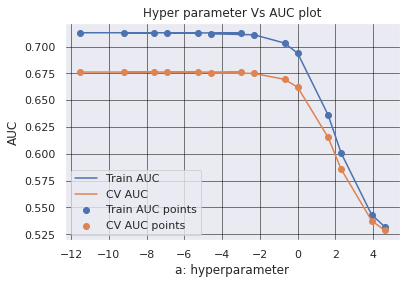

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.078241,0.002742,0.008533,0.000165,1e-05,{'alpha': 1e-05},0.673932,0.671187,0.671857,0.672657,0.681978,0.682873,0.668472,0.673189,0.682250,0.683494,0.676189,0.005461,1,0.710444,0.713100,0.713214,0.713110,0.714816,0.712583,0.711612,0.712747,0.714326,0.712426,0.712838,0.001178
2,0.076763,0.000913,0.008869,0.000822,0.0001,{'alpha': 0.0001},0.673930,0.671181,0.671854,0.672653,0.681976,0.682871,0.668470,0.673182,0.682268,0.683492,0.676188,0.005464,2,0.710441,0.713092,0.713211,0.713107,0.714812,0.712579,0.711608,0.712744,0.714321,0.712422,0.712834,0.001178
1,0.077589,0.001780,0.008538,0.000117,0.0005,{'alpha': 0.0005},0.673923,0.671164,0.671843,0.672646,0.681970,0.682862,0.668461,0.673172,0.682321,0.683484,0.676185,0.005472,3,0.710431,0.713076,0.713202,0.713097,0.714803,0.712570,0.711599,0.712735,0.714311,0.712412,0.712824,0.001178
4,0.079592,0.002807,0.008702,0.000241,0.001,{'alpha': 0.001},0.673917,0.671152,0.671838,0.672638,0.681967,0.682852,0.668456,0.673161,0.682350,0.683476,0.676181,0.005476,4,0.710421,0.713062,0.713192,0.713087,0.714792,0.712559,0.711589,0.712725,0.714300,0.712402,0.712813,0.001178
3,0.076665,0.000861,0.008554,0.000231,0.005,{'alpha': 0.005},0.673855,0.671095,0.671792,0.672585,0.681910,0.682776,0.668400,0.673114,0.682422,0.683432,0.676138,0.005489,5,0.710341,0.712969,0.713112,0.713007,0.714710,0.712482,0.711510,0.712646,0.714219,0.712323,0.712732,0.001177


In [155]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

neigh = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
log_alphas =[]
for i in parameters['alpha']:
  a= math.log(i)
  log_alphas.append(a)
print(log_alphas)

clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_tfidf, y_train)

results_tfidf = pd.DataFrame.from_dict(clf.cv_results_)
print(results_tfidf .columns)
results_tfidf  = results_tfidf.sort_values(['param_alpha'])

train_auc= results_tfidf['mean_train_score']
train_auc_std= results_tfidf['std_train_score']
cv_auc = results_tfidf['mean_test_score'] 
cv_auc_std= results_tfidf['std_test_score']
a =  results['param_alpha']

plt.plot(log_alphas, train_auc, label='Train AUC')


plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("a: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

results_tfidf.head()

In [156]:
best_alpha_tfidf=clf.best_params_
print(best_alpha_tfidf)

{'alpha': 1e-05}


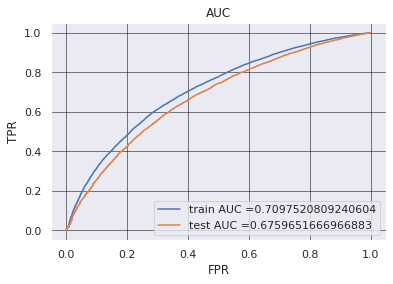

In [157]:
from sklearn.metrics import roc_curve, auc


neigh = MultinomialNB(alpha=best_alpha_tfidf['alpha'],class_prior=[0.5,0.5])
neigh.fit(X_tr_tfidf, y_train)

y_train_pred_tfidf = batch_predict(neigh, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(neigh, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

#Find the best hyper paramter using k-fold cross validation(RandomizedSearchCV)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


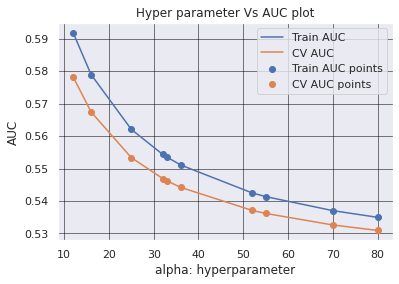

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
5,0.076166,0.000610,0.008527,0.000105,12,{'alpha': 12},0.571410,0.587987,0.574628,0.575304,0.581421,0.576690,0.566913,0.580128,0.587269,0.580199,0.578195,0.006269,1,0.591654,0.591095,0.592135,0.592123,0.591316,0.591790,0.593284,0.592142,0.591240,0.591221,0.591800,0.000628
9,0.075904,0.000881,0.008411,0.000099,16,{'alpha': 16},0.560015,0.577735,0.563849,0.564728,0.570192,0.565905,0.555970,0.570431,0.576177,0.569176,0.567418,0.006412,2,0.579071,0.578126,0.579270,0.579288,0.578412,0.578882,0.580529,0.579132,0.578229,0.578379,0.578932,0.000676
1,0.075366,0.000598,0.008424,0.000064,25,{'alpha': 25},0.544808,0.564076,0.549925,0.550849,0.555451,0.552350,0.541738,0.558073,0.561190,0.554831,0.553329,0.006574,3,0.562524,0.561141,0.562371,0.562391,0.561497,0.561898,0.563698,0.562003,0.561194,0.561570,0.562029,0.000726
3,0.075164,0.000393,0.008368,0.000076,32,{'alpha': 32},0.537708,0.557544,0.543626,0.544495,0.548672,0.546516,0.535328,0.552832,0.554249,0.548216,0.546918,0.006651,4,0.554988,0.553454,0.554681,0.554699,0.553814,0.554170,0.556021,0.554214,0.553496,0.553965,0.554350,0.000738
6,0.105839,0.010859,0.012861,0.001572,33,{'alpha': 33},0.536893,0.556777,0.542903,0.543771,0.547891,0.545881,0.534578,0.552250,0.553415,0.547448,0.546181,0.006660,5,0.554128,0.552583,0.553803,0.553826,0.552937,0.553287,0.555140,0.553321,0.552614,0.553097,0.553474,0.000739


In [176]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB

neigh = MultinomialNB(class_prior=[0.5,0.5])
parameters_rand = {'alpha':sp_randint(1,100)}
clf_rand = RandomizedSearchCV(neigh, parameters_rand, cv=10, scoring='roc_auc',return_train_score=True)
clf_rand.fit(X_tr_tfidf, y_train)

results_rand_tfidf = pd.DataFrame.from_dict(clf_rand.cv_results_)
print(results_rand_tfidf.columns)

results_rand_tfidf = results_rand_tfidf.sort_values(['param_alpha'])

train_auc_rand= results_rand_tfidf['mean_train_score']
train_auc_std= results_rand_tfidf['std_train_score']
cv_auc_rand = results_rand_tfidf['mean_test_score'] 
cv_auc_std= results_rand_tfidf['std_test_score']
a_rand =  results_rand_tfidf['param_alpha']

plt.plot(a_rand, train_auc_rand, label='Train AUC')


plt.plot(a_rand, cv_auc_rand, label='CV AUC')

plt.scatter(a_rand, train_auc_rand, label='Train AUC points')
plt.scatter(a_rand, cv_auc_rand, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

results_rand_tfidf.head()

In [177]:
results_rand[['param_alpha','mean_test_score','mean_train_score']]
best_alpha_tfidf_rand=clf_rand.best_params_
best_alpha_tfidf_rand

{'alpha': 12}

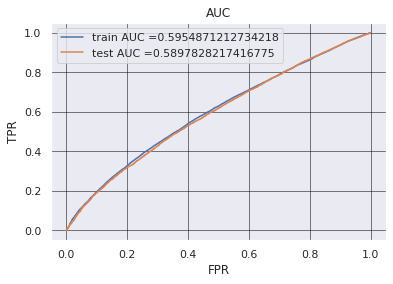

In [178]:
from sklearn.metrics import roc_curve, auc


neigh = MultinomialNB(alpha=best_alpha_tfidf_rand['alpha'],class_prior=[0.5,0.5])
neigh.fit(X_tr_tfidf, y_train)

y_train_pred_rand_tfidf = neigh.predict_proba( X_tr_tfidf)[:,1]    
y_test_pred_rand_tfidf = neigh.predict_proba( X_te_tfidf)[:,1]

train_fpr_rand_tfidf, train_tpr_rand_tfidf, tr_thresholds_rand_tfidf = roc_curve(y_train, y_train_pred_rand_tfidf)
test_fpr_rand_tfidf, test_tpr_rand_tfidf, te_thresholds_rand_tfidf = roc_curve(y_test, y_test_pred_rand_tfidf)

plt.plot(train_fpr_rand_tfidf, train_tpr_rand_tfidf, label="train AUC ="+str(auc(train_fpr_rand_tfidf, train_tpr_rand_tfidf)))
plt.plot(test_fpr_rand_tfidf, test_tpr_rand_tfidf, label="test AUC ="+str(auc(test_fpr_rand_tfidf, test_tpr_rand_tfidf)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

#Confusion Matrix

In [179]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [180]:
neigh = MultinomialNB(alpha=best_alpha_tfidf['alpha'],class_prior=[0.5,0.5])
neigh.fit(X_tr_tfidf, y_train)

y_train_pred_tfidf = batch_predict(neigh, X_tr_tfidf)    
y_test_pred_tfidf = batch_predict(neigh, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)


In [181]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t)))

the maximum value of tpr*(1-fpr) 0.43108460602577914 for threshold 0.509
Train confusion matrix
[[ 7522  3561]
 [22661 39452]]
Test confusion matrix
[[ 3475  1984]
 [11376 19217]]


Confusion Matrix: Train


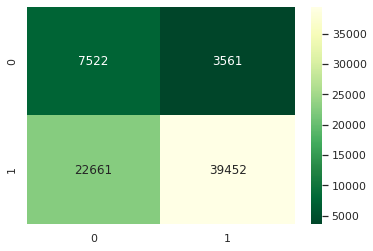

Confusion Matrix: Test


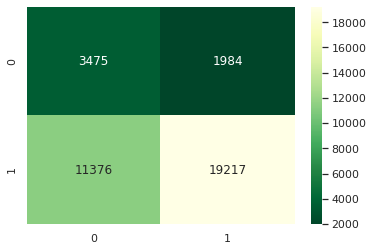

In [184]:
print('Confusion Matrix: Train')
cm_tr=confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t))
sns.set(font_scale=1)
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGn_r')
plt.show()

print('Confusion Matrix: Test')
cm_tr=confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t))
sns.set(font_scale=1)
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGn_r')
plt.show()

#Find the top 20 features from Set 1: BOW

In [185]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [186]:
neigh_bow = MultinomialNB(alpha = 1e-05,class_prior=[0.5,0.5])
neigh_bow.fit(X_tr, y_train)
top_20_features_bow=[]

for feature in vectorizer_essay.get_feature_names() :
   top_20_features_bow.append(feature )

for feature in vectorizer_School_State.get_feature_names() :
   top_20_features_bow.append(feature )

for feature in vectorizer_teacher_prefix.get_feature_names() :
    top_20_features_bow.append(feature )

for feature in vectorizer_project_grade_category .get_feature_names() :
    top_20_features_bow.append(feature )

for feature in vectorizer_clean_categories.get_feature_names() :
    top_20_features_bow.append(feature )

for feature in vectorizer_clean_subcategories.get_feature_names() :
    top_20_features_bow.append(feature )

top_20_features_bow.append("teacher_number_of_previously_posted_projects")
top_20_features_bow.append("price")

In [187]:
#https://stackoverflow.com/questions/51968769/getting-feature-importance-in-naive-bayes
#https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
features_list_pos = neigh_bow.feature_log_prob_[1, :].argsort()[::-1][:-1]
top_20_positive_features=np.take(top_20_features_bow,features_list_pos )
print('Top 20 positive features ')
print('-----------------------------------')
for i in range(20):
  print(top_20_positive_features[i])

Top 20 positive features 
-----------------------------------
students
school
my
learning
classroom
the
not
they
my students
learn
help
many
nannan
we
need
work
reading
use
love
day


In [108]:
len(top_20_features_bow)

5101

In [188]:
features_list_neg = neigh_bow.feature_log_prob_[0, :].argsort()[::-1][:20]
top_20_negative_features=np.take(top_20_features_bow,features_list_neg)
print('Top 20 negative features ')
print('-----------------------------------')
for i in range(20):
  print(top_20_negative_features[i])


Top 20 negative features 
-----------------------------------
students
school
learning
my
classroom
not
learn
they
help
the
my students
nannan
many
we
need
work
come
love
reading
materials


#Find the top 20 features from Set 2: TF-IDF

In [189]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_te_tfidf.shape, y_test.shape)

Final Data matrix
(73196, 5101) (73196,)
(36052, 5101) (36052,)


In [190]:
neigh_tfidf = MultinomialNB(alpha = 1e-05,class_prior=[0.5,0.5])
neigh_tfidf.fit(X_tr_tfidf, y_train)
top_20_features_tfidf=[]

for feature in vectorizer_essay_tfidf.get_feature_names() :
   top_20_features_tfidf.append(feature )

for feature in vectorizer_School_State.get_feature_names() :
   top_20_features_tfidf.append(feature )

for feature in vectorizer_teacher_prefix.get_feature_names() :
    top_20_features_tfidf.append(feature )

for feature in vectorizer_project_grade_category .get_feature_names() :
   top_20_features_tfidf.append(feature )

for feature in vectorizer_clean_categories.get_feature_names() :
    top_20_features_tfidf.append(feature )

for feature in vectorizer_clean_subcategories.get_feature_names() :
    top_20_features_tfidf.append(feature )

top_20_features_tfidf.append("teacher_number_of_previously_posted_projects")
top_20_features_tfidf.append("price")

In [191]:
#https://stackoverflow.com/questions/51968769/getting-feature-importance-in-naive-bayes
#https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order


features_list_pos = neigh_tfidf.feature_log_prob_[1, :].argsort()[::-1][:20]
top_20_positive_features=np.take( top_20_features_tfidf,features_list_pos )
print('Top 20 positive features ')
print('-----------------------------------')
for i in range(20):
  print(top_20_positive_features[i])




Top 20 positive features 
-----------------------------------
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
literacy
mathematics
literature_writing
grades_6_8
ca
students
health_sports
specialneeds
specialneeds
appliedlearning
grades_9_12
mr
appliedsciences
health_wellness


In [113]:
features_list_neg= neigh_tfidf.feature_log_prob_[0, :].argsort()[::-1][:-1]

top_20_negative_features=np.take(top_20_features_tfidf,features_list_neg)
print('Top 20 negative features ')
print('-----------------------------------')
for i in range(20):
  print(top_20_negative_features[i])


Top 20 negative features 
-----------------------------------
mrs
literacy_language
grades_prek_2
math_science
ms
grades_3_5
mathematics
literacy
literature_writing
grades_6_8
specialneeds
specialneeds
students
ca
health_sports
appliedlearning
appliedsciences
grades_9_12
mr
music_arts


#Summary

In [115]:
from prettytable import PrettyTable


conclusion = PrettyTable()
conclusion.field_names = ["Vectorizer", "Model", "Hyper Parameter", " Test AUC"]

conclusion.add_row(["BOW", "Naive Bayes", 1e-05, 0.69076])
conclusion.add_row(["TFIDF", "Naive Bayes", 1e-05, 0.6759])

print(conclusion)

+------------+-------------+-----------------+-----------+
| Vectorizer |    Model    | Hyper Parameter |  Test AUC |
+------------+-------------+-----------------+-----------+
|    BOW     | Naive Bayes |      1e-05      |  0.69076  |
|   TFIDF    | Naive Bayes |      1e-05      |   0.6759  |
+------------+-------------+-----------------+-----------+
